### Load Library

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'; plt.rcParams['axes.unicode_minus'] = False

### Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
dt_info = pd.read_csv('data/data_info.csv')

In [9]:
sub = pd.read_csv('data/sample_submission.csv')

### 데이터 확인

#### TRAIN

In [212]:
train.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0


In [213]:
train.shape

(4701217, 23)

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

- 결측치 존재하지 않음

In [215]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

#### TEST

In [216]:
test.head(3)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음


In [217]:
test.shape

(291241, 22)

In [218]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

- 결측치 존재하지 않음

In [219]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

### EDA

#### day_of_week (요일)

- train 데이터는 모든 요일이 균등하게 분포함
- 특정 요일이 결과에 영향을 미치지 않으므로 oversampling 필요하지 않음

In [220]:
train['day_of_week'].value_counts()

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64

c:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


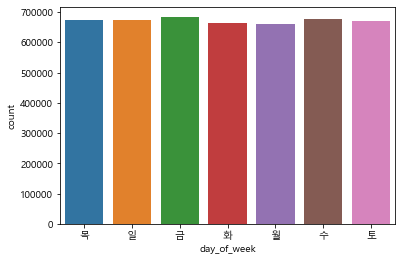

In [221]:
sns.countplot(train['day_of_week'])
plt.show()

- test 데이터는 train 데이터와 다르게 `월`, `화`, `수` 요일이 다른 요일에 비해 많음

In [222]:
test['day_of_week'].value_counts()

화    47452
수    46974
월    46405
금    38029
목    37983
토    37280
일    37118
Name: day_of_week, dtype: int64

c:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


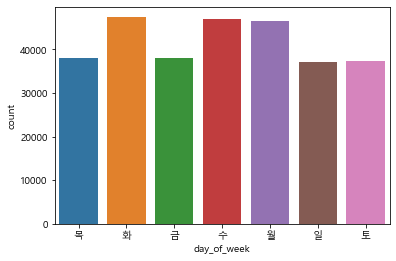

In [223]:
sns.countplot(test['day_of_week'])
plt.show()

#### base_hour(시간대)

- 출·퇴근 시간에 통행량이 눈에 띄게 많을 것이라는 예상과 다르게, 새벽 시간대에 분포가 적고, 전체적으로 완만한 곡선의 형태가 나타남

c:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


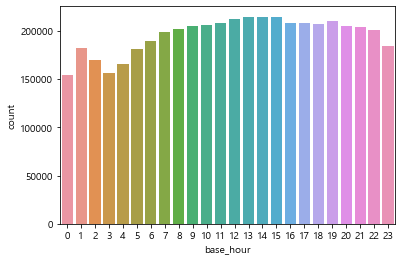

In [224]:
sns.countplot(train['base_hour'])
plt.show()

- test 데이터 역시 새벽 시간대의 분포가 적고, train 데이터와 다르게 7시 이후 모든 시간대의 분포가 거의 동일함

c:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


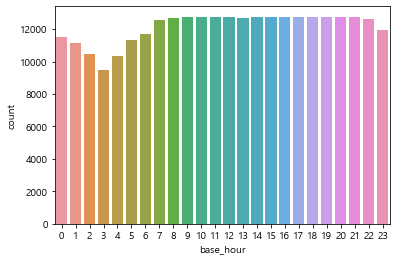

In [225]:
sns.countplot(test['base_hour'])
plt.show()

### 데이터셋 분리

추후 validation set 처리로 데이터셋 분리 후, 전처리 작업 수행

In [10]:
split_train = train.drop('target', axis = 1)
split_target = train['target']

x_train, x_valid, y_train, y_valid = train_test_split(split_train, split_target, test_size = 0.2, random_state = 42)

### 데이터 전처리

#### base_date (날짜)

년월일 함께있는 데이터를 년/월/일로 나누어 새로운 column 생성

- 년/월/일 별로 다른 영향을 미칠 수 있다고 판단

In [11]:
## train set 처리

# 숫자형식이므로, 문자형으로 변경
x_train = x_train.astype({'base_date' : 'str'})

# 날짜 형식으로 변환해주기
x_train['date'] = pd.to_datetime(x_train['base_date'])

# 년/월/일 쪼갠 후, 기존 column 삭제
x_train['year'] = x_train['date'].dt.year
x_train['month'] = x_train['date'].dt.month
x_train['day'] = x_train['date'].dt.day

x_train.drop(['base_date', 'date'], axis = 1, inplace = True)

x_train.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
1425306,TRAIN_1425306,수,5,1,106,지방도97호선,0,0,60.0,0.0,...,33.452688,126.709277,없음,대원교,33.438329,126.732032,없음,2022,3,9
981507,TRAIN_0981507,일,13,1,103,일반국도99호선,0,0,60.0,0.0,...,33.255663,126.434978,없음,회수사거리,33.263239,126.443826,없음,2022,7,17
4006446,TRAIN_4006446,화,14,2,103,일반국도16호선,0,0,60.0,0.0,...,33.265431,126.565134,없음,동홍교,33.265365,126.564924,없음,2021,11,2


In [12]:
## validation set 처리

# 숫자형식이므로, 문자형으로 변경
x_valid = x_valid.astype({'base_date' : 'str'})

# 날짜 형식으로 변환해주기
x_valid['date'] = pd.to_datetime(x_valid['base_date'])

# 년/월/일 쪼갠 후, 기존 column 삭제
x_valid['year'] = x_valid['date'].dt.year
x_valid['month'] = x_valid['date'].dt.month
x_valid['day'] = x_valid['date'].dt.day

x_valid.drop(['base_date', 'date'], axis = 1, inplace = True)

x_valid.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
1668774,TRAIN_1668774,일,2,2,103,일반국도12호선,0,0,60.0,0.0,...,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,2022,1,23
299795,TRAIN_0299795,토,11,3,106,번영로,0,0,70.0,0.0,...,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,2022,7,9
2245633,TRAIN_2245633,토,12,1,107,산서로,0,0,50.0,0.0,...,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,2022,7,9


In [13]:
## test 데이터셋도 변환
test = test.astype({'base_date' : 'str'})

test['date'] = pd.to_datetime(test['base_date'])
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day

test.drop(['base_date', 'date'], axis = 1, inplace = True)

test.head(3)

,id,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,...,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day
0,TEST_000000,목,17,3,107,연삼로,0,0,70.0,0.0,...,33.499427,126.541298,0,제주은행사거리,33.500772,126.543837,1,2022,8,25
1,TEST_000001,화,12,2,103,일반국도12호선,0,0,70.0,0.0,...,33.258507,126.427003,0,관광단지입구,33.258119,126.415840,0,2022,8,9
2,TEST_000002,금,2,1,103,일반국도16호선,0,0,60.0,0.0,...,33.258960,126.476508,0,도순2교,33.259206,126.474687,0,2022,8,5


어떤 월에 가장 많이 분포되어있는지 확인
- 12월에 가장 많이 분포

In [14]:
sns.countplot(x_train['month'])
plt.show()

KeyError: 0

어떤 일에 가장 많이 분포되어있는지 확인
- 주로 3일에 많이 분포

In [ ]:
sns.countplot(x_train['day'])
plt.show()

KeyError: 0

#### day_of_week(요일)

문자 column이므로, 원핫인코딩을 통하여 범주형 데이터로 변환해줌

- Baseline에서 사용한 Label Encoder는 일괄적인 숫자 값으로 변환이 되며, 아무 의미 없는 값들에 의미를 부여하여 학습하게 되어 회귀 모델에서는 성능이 떨어질 수 있음을 확인하여 사용하지 않음

In [15]:
ohe = OneHotEncoder(sparse = False)

In [16]:
## train set 처리
train_encoder = ohe.fit_transform(x_train[['day_of_week']])

## 결과는 array이므로 데이터프레임으로 변환
train_encoder = pd.DataFrame(train_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
train_encoder = train_encoder.astype(dtype = 'int64')

# 기존 데이터와 인코딩 데이터의 인덱스가 맞지 않음
# 기존 데이터 인덱스 리셋
x_train.reset_index(drop = True, inplace = True)

# 기존 column 삭제 후, x_train set과 encoding 데이터 병합
x_train = x_train.drop(['day_of_week'], axis = 1)
x_train = pd.concat([x_train, train_encoder], axis = 1)

x_train.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TRAIN_1425306,5,1,106,지방도97호선,0,0,60.0,0.0,0.0,...,2022,3,9,0,0,1,0,0,0,0
1,TRAIN_0981507,13,1,103,일반국도99호선,0,0,60.0,0.0,0.0,...,2022,7,17,0,0,0,0,1,0,0
2,TRAIN_4006446,14,2,103,일반국도16호선,0,0,60.0,0.0,32400.0,...,2021,11,2,0,0,0,0,0,0,1


In [17]:
## validation set 처리
train_encoder = ohe.transform(x_valid[['day_of_week']])

## 결과는 array이므로 데이터프레임으로 변환
train_encoder = pd.DataFrame(train_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
train_encoder = train_encoder.astype(dtype = 'int64')

# 기존 데이터와 인코딩 데이터의 인덱스가 맞지 않음
# 기존 데이터 인덱스 리셋
x_valid.reset_index(drop = True, inplace = True)

# 기존 column 삭제 후, x_valid set과 encoding 데이터 병합
x_valid = x_valid.drop(['day_of_week'], axis = 1)
x_valid = pd.concat([x_valid, train_encoder], axis = 1)

x_valid.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TRAIN_1668774,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,...,2022,1,23,0,0,0,0,1,0,0
1,TRAIN_0299795,11,3,106,번영로,0,0,70.0,0.0,0.0,...,2022,7,9,0,0,0,0,0,1,0
2,TRAIN_2245633,12,1,107,산서로,0,0,50.0,0.0,0.0,...,2022,7,9,0,0,0,0,0,1,0


In [18]:
## test set 처리
test_encoder = ohe.transform(test[['day_of_week']])

## 결과는 array이므로 데이터프레임으로 변환
test_encoder = pd.DataFrame(test_encoder, columns = [col for col in ohe.categories_[0]])

# 정수형 → 실수형 변환
test_encoder = test_encoder.astype(dtype = 'int64')

# 기존 column 삭제 후, test set과 encoding 데이터 병합
test = test.drop(['day_of_week'], axis = 1)
test = pd.concat([test, test_encoder], axis = 1)

test.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,year,month,day,금,목,수,월,일,토,화
0,TEST_000000,17,3,107,연삼로,0,0,70.0,0.0,0.0,...,2022,8,25,0,1,0,0,0,0,0
1,TEST_000001,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,...,2022,8,9,0,0,0,0,0,0,1
2,TEST_000002,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,...,2022,8,5,1,0,0,0,0,0,0


#### 거리 데이터 (두 지점 사이의 거리)

- 데이콘의 얼라인(align) 팀의 코드 참고
- 출처 https://www.kaggle.com/code/speedoheck/calculate-distance-with-geo-coordinates/notebook

Haversine(하버사인) 공식 사용하여 두 지점 사이의 거리를 구함

In [19]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):

    # convert decimal degrees to radians
    lon1 = row['start_longitude']
    lat1 = row['start_latitude']
    lon2 = row['end_longitude']
    lat2 = row['end_latitude']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    
    return km

In [20]:
x_train['distance'] = x_train.apply(haversine, axis=1)
x_train.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TRAIN_1425306,5,1,106,지방도97호선,0,0,60.0,0.0,0.0,...,3,9,0,0,1,0,0,0,0,2.645434
1,TRAIN_0981507,13,1,103,일반국도99호선,0,0,60.0,0.0,0.0,...,7,17,0,0,0,0,1,0,0,1.176784
2,TRAIN_4006446,14,2,103,일반국도16호선,0,0,60.0,0.0,32400.0,...,11,2,0,0,0,0,0,0,1,0.020828


In [21]:
x_valid['distance'] = x_valid.apply(haversine, axis=1)
x_valid.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TRAIN_1668774,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,...,1,23,0,0,0,0,1,0,0,0.157871
1,TRAIN_0299795,11,3,106,번영로,0,0,70.0,0.0,0.0,...,7,9,0,0,0,0,0,1,0,2.073819
2,TRAIN_2245633,12,1,107,산서로,0,0,50.0,0.0,0.0,...,7,9,0,0,0,0,0,1,0,0.168180


In [22]:
test['distance'] = test.apply(haversine, axis=1)
test.head(3)

,id,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,...,month,day,금,목,수,월,일,토,화,distance
0,TEST_000000,17,3,107,연삼로,0,0,70.0,0.0,0.0,...,8,25,0,1,0,0,0,0,0,0.278752
1,TEST_000001,12,2,103,일반국도12호선,0,0,70.0,0.0,0.0,...,8,9,0,0,0,0,0,0,1,1.038287
2,TEST_000002,2,1,103,일반국도16호선,0,0,60.0,0.0,0.0,...,8,5,1,0,0,0,0,0,0,0.171335


#### 불필요 column 제거

도로명을 나타내는 `road_name`, `start_node_name`, `end_node_name` 제거

In [23]:
x_train.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1)

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,...,month,day,금,목,수,월,일,토,화,distance
0,5,1,106,0,0,60.0,0.0,0.0,0.0,0,...,3,9,0,0,1,0,0,0,0,2.645434
1,13,1,103,0,0,60.0,0.0,0.0,0.0,0,...,7,17,0,0,0,0,1,0,0,1.176784
2,14,2,103,0,0,60.0,0.0,32400.0,0.0,3,...,11,2,0,0,0,0,0,0,1,0.020828
3,13,1,107,0,0,50.0,0.0,0.0,0.0,0,...,12,26,0,0,0,0,1,0,0,0.808706
4,14,3,107,0,0,60.0,0.0,0.0,0.0,0,...,3,5,0,0,0,0,0,1,0,0.336891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760968,19,2,107,0,0,50.0,0.0,0.0,0.0,0,...,6,20,0,0,0,1,0,0,0,0.076826
3760969,21,2,107,0,0,50.0,0.0,0.0,0.0,0,...,1,17,0,0,0,1,0,0,0,0.333555
3760970,5,2,103,0,0,60.0,0.0,0.0,0.0,0,...,1,6,0,1,0,0,0,0,0,0.383595
3760971,14,3,106,0,0,70.0,0.0,0.0,0.0,3,...,7,11,0,0,0,1,0,0,0,0.371276


In [24]:
x_train.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)
x_valid.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)

In [25]:
test.drop(['id', 'road_name', 'start_node_name', 'end_node_name'], axis = 1, inplace = True)

vehicle_restricted (통과제한차량)
- 확인했을 때, 값이 하나뿐이므로 불필요하다 판단하여 제거함

In [26]:
x_train['vehicle_restricted'].unique()

array([0.])

In [27]:
x_valid['vehicle_restricted'].unique()

array([0.])

In [28]:
x_train.drop('vehicle_restricted', axis = 1, inplace = True)
x_valid.drop('vehicle_restricted', axis = 1, inplace = True)

- test set 역시 값이 하나뿐

In [29]:
test['vehicle_restricted'].unique()

array([0.])

In [30]:
test.drop('vehicle_restricted', axis = 1, inplace = True)
test.head(3)

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,height_restricted,road_type,start_latitude,...,month,day,금,목,수,월,일,토,화,distance
0,17,3,107,0,0,70.0,0.0,0.0,0,33.499427,...,8,25,0,1,0,0,0,0,0,0.278752
1,12,2,103,0,0,70.0,0.0,0.0,3,33.258507,...,8,9,0,0,0,0,0,0,1,1.038287
2,2,1,103,0,0,60.0,0.0,0.0,0,33.258960,...,8,5,1,0,0,0,0,0,0,0.171335


#### 문자열  Column 범주형으로 변경

- 회전 제한 유무(`start_turn_restricted`, `end_turn_restricted`)

- 없음 : 0, 있음 : 1

In [31]:
x_train.loc[x_train['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
x_train.loc[x_train['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

x_train = x_train.astype({'start_turn_restricted' : 'int64'})

x_train['start_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [32]:
x_train.loc[x_train['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
x_train.loc[x_train['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

x_train = x_train.astype({'end_turn_restricted' : 'int64'})

x_train['end_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [33]:
x_valid.loc[x_valid['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
x_valid.loc[x_valid['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

x_valid = x_valid.astype({'start_turn_restricted' : 'int64'})

x_valid['start_turn_restricted'].unique()

x_valid.loc[x_valid['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
x_valid.loc[x_valid['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

x_valid = x_valid.astype({'end_turn_restricted' : 'int64'})

x_valid['end_turn_restricted'].unique()

array([0, 1], dtype=int64)

In [34]:
## test 데이터셋도 변경해주기
test.loc[test['start_turn_restricted'] == "없음", 'start_turn_restricted'] = 0
test.loc[test['start_turn_restricted'] == "있음", 'start_turn_restricted'] = 1

test = test.astype({'start_turn_restricted' : 'int64'})

test['start_turn_restricted'].unique()


test.loc[test['end_turn_restricted'] == "없음", 'end_turn_restricted'] = 0
test.loc[test['end_turn_restricted'] == "있음", 'end_turn_restricted'] = 1

test = test.astype({'end_turn_restricted' : 'int64'})

test['end_turn_restricted'].unique()

array([1, 0], dtype=int64)

### Modeling

#### Machine Learning

##### Random Forest

- 과적합 (overfitting) 문제를 해결하기 위한 최적의 모델
- 대용량 데이터 처리에 적합
- 위와 같은 이유로 모델 선정하여 학습

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
regr = RandomForestRegressor(criterion = "mae")
regr.fit(x_train, y_train)

In [ ]:
regr.score(x_train, y_train)
regr.score(x_valid, y_valid)

##### XGBoost

- 머신러닝 모델 중 가장 강력한 예측력을 가진 모델
- 과적합 (overfitting) 방지
- Random Forest보다 적합하다고 판단하여 모델 사용

In [337]:
from xgboost import XGBRegressor

In [338]:
# 하이퍼파라미터 튜닝 X
model = XGBRegressor()

model.fit(x_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [339]:
val_pred = model.predict(x_valid)

from sklearn.metrics import  mean_absolute_error
mean_absolute_error(val_pred, y_valid)

3.8376100252975407

정확도 높지만, 조금 더 높은 정확도를 가지기 위하여 하이퍼파라미터를 조정하여 학습

In [340]:
model.score(x_train, y_train)

0.8911727481771896

In [341]:
pred = model.predict(test)

성능을 높이기 위하여, 기본 파라미터에서 depth를 높이고 learning_rate를 낮춤

In [342]:
model_2 = XGBRegressor(max_depth = 15, learning_rate = 0.1)
model_2.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [343]:
val_pred = model_2.predict(x_valid)

from sklearn.metrics import  mean_absolute_error
mean_absolute_error(val_pred, y_valid)

3.8376100252975407

파라미터 조정 후, 조금 더 높은 정확도를 가지는 것을 볼 수 있음

In [344]:
model_2.score(x_train, y_train)

0.9448624190396702

In [345]:
pred_2 = model_2.predict(test)

#### Deep Learning

#### 추가 데이터 전처리

딥러닝 모델은 정규화가 필수로 진행되어야 하므로, 머신러닝 모델을 사용하기 위해 전처리한 위 과정에서 추가로 진행함

##### 정규화 (`Standard Scaler` 사용)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
test = scaler.transform(test)

#### MLP

In [37]:
import tensorflow as tf
from tensorflow import keras

##### layer 3개, early stopping 사용 X, optimizer adam

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1728      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss = "mae", optimizer = 'adam')
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
117531/117531 [==============================] - 110s 934us/step - loss: 5.7991 - val_loss: 5.4115
Epoch 2/30
117531/117531 [==============================] - 109s 926us/step - loss: 5.1583 - val_loss: 5.0845
Epoch 3/30
117531/117531 [==============================] - 109s 925us/step - loss: 4.9797 - val_loss: 5.0452
Epoch 4/30
117531/117531 [==============================] - 109s 931us/step - loss: 4.8799 - val_loss: 4.8770
Epoch 5/30
117531/117531 [==============================] - 110s 933us/step - loss: 4.8129 - val_loss: 4.8084
Epoch 6/30
117531/117531 [==============================] - 110s 932us/step - loss: 4.7591 - val_loss: 4.7192
Epoch 7/30
117531/117531 [==============================] - 110s 937us/step - loss: 4.7100 - val_loss: 4.7122
Epoch 8/30
117531/117531 [==============================] - 109s 929us/step - loss: 4.6680 - val_loss: 4.6327
Epoch 9/30
117531/117531 [==============================] - 110s 936us/step - loss: 4.6320 - val_loss: 4.5856
Epoch 10/3

- 성능 확인

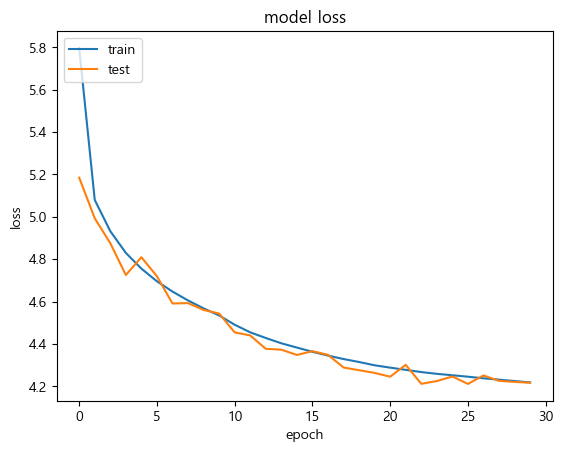

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

- 예측 후, 제출 파일에 저장

In [ ]:
pred = model.predict(test)

sub['target'] = pred
sub.to_csv("data/submit_deep_1.csv", index = False)

##### layer 4개, earily stopping 사용 O, optimizer adam

In [38]:
model_2 = keras.models.Sequential([
    keras.layers.Dense(128, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3456      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,  restore_best_weights = True)
model_2.compile(loss = "mae", optimizer = 'adam')
history = model_2.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
117531/117531 [==============================] - 123s 1ms/step - loss: 5.4931 - val_loss: 5.0857
Epoch 2/30
117531/117531 [==============================] - 122s 1ms/step - loss: 4.8361 - val_loss: 4.7518
Epoch 3/30
117531/117531 [==============================] - 123s 1ms/step - loss: 4.6519 - val_loss: 4.6142
Epoch 4/30
117531/117531 [==============================] - 126s 1ms/step - loss: 4.4996 - val_loss: 4.4149
Epoch 5/30
117531/117531 [==============================] - 122s 1ms/step - loss: 4.3635 - val_loss: 4.2876
Epoch 6/30
117531/117531 [==============================] - 123s 1ms/step - loss: 4.2790 - val_loss: 4.2391
Epoch 7/30
117531/117531 [==============================] - 123s 1ms/step - loss: 4.2254 - val_loss: 4.1904
Epoch 8/30
117531/117531 [==============================] - 122s 1ms/step - loss: 4.1754 - val_loss: 4.1839
Epoch 9/30
117531/117531 [==============================] - 123s 1ms/step - loss: 4.1293 - val_loss: 4.1018
Epoch 10/30
117531/117531 [=

- 성능 확인

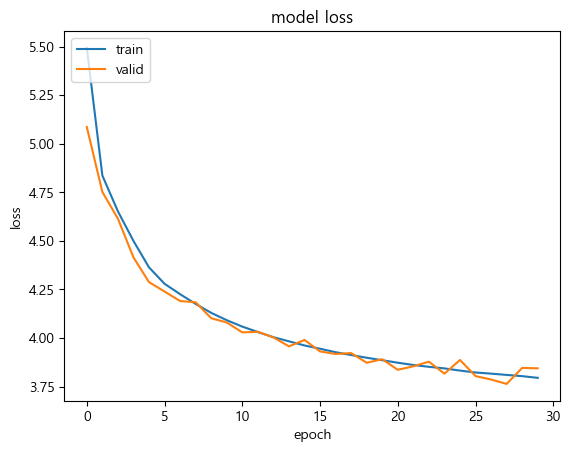

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [41]:
pred_model2 = model_2.predict(test)

9102/9102 [==============================] - 6s 636us/step


In [42]:
sub['target'] = pred_model2
sub.to_csv("data/submit_deep_2.csv", index = False)

##### layer 4개, earily stopping 사용 O, optimizer sgd

In [ ]:
model_3 = keras.models.Sequential([
    keras.layers.Dense(64, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1) # regression 문제이기 때문에 output은 1개
])

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,  restore_best_weights = True)
model_3.compile(loss = "mae", optimizer = 'sgd', metrics = ['accuracy'])
history = model_3.fit(x_train, y_train, epochs = 300, validation_data = (x_valid, y_valid))

In [ ]:
y_pred = model.predict(test)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()